In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from Scrapping import BeautifulSoupScrape as BSC
from Project_Final_Scripts.date_utils import date_range
import time
import json

In [28]:
corona_ratio_data = '..\\corona_lb_ratios2.csv'

pd.set_option('display.max_rows', 255)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [29]:
df = pd.read_csv(corona_ratio_data, header=0)
df.head()

,date,year,month,day,new_cases,new_deaths,prev_cases,prev_deaths,total_cases,total_deaths,month_avg_ratio,cumulative_avg_ratio,diff_avg_ratio,simple_ratio
0,2/1/2020,2020,2,1,0,0,0,0,0,0,-1.0,-1.0,0.118641,-0.061092
1,2/2/2020,2020,2,2,0,0,0,0,0,0,-1.0,-1.0,0.118641,-0.061092
2,2/3/2020,2020,2,3,0,0,0,0,0,0,-1.0,-1.0,0.118641,-0.061092
3,2/4/2020,2020,2,4,0,0,0,0,0,0,-1.0,-1.0,0.118641,-0.061092
4,2/5/2020,2020,2,5,0,0,0,0,0,0,-1.0,-1.0,0.118641,-0.061092


In [30]:
x = df.month.map(str) + '_' + df.day.map(str)
y = df.diff_avg_ratio

zero = [0 for _ in range(len(x))]

max_value = df.diff_avg_ratio.max()
maximum = [max_value for _ in range(len(x))]

min_value = df.diff_avg_ratio.min()
minimum = [min_value for _ in range(len(x))]

std_value = df.diff_avg_ratio.std()
pos_std = [std_value for _ in range(len(x))]
neg_std = [-std_value for _ in range(len(x))]

In [31]:
hotspots_data = []
hotspots = []

for index, row in df.iterrows():
    # negative hotspots
    if row.diff_avg_ratio <= -0.5:# -std_value:
        hotspots_data.append({
            'date': row.date,
            'prev_cases': row.prev_cases,
            'new_cases': row.new_cases,
            'cases_diff': abs(row.new_cases - row.prev_cases),
            'ratio': row.diff_avg_ratio
        })
        hotspots.append(row.diff_avg_ratio)
        
    else:
        hotspots.append(0)
        
    
print(len(hotspots_data), 'negative hotspots')
print(len(hotspots), 'spots')

11 negative hotspots
232 spots


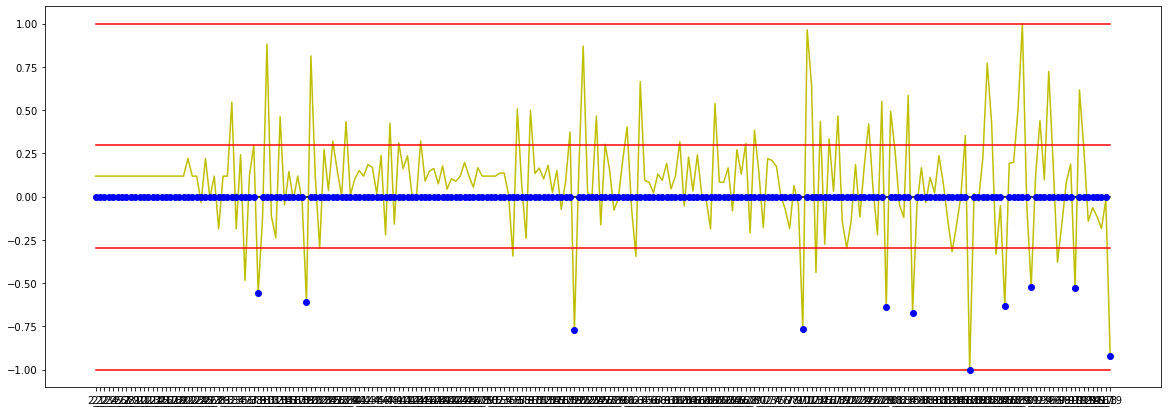

In [32]:
plt.figure(figsize=(20, 7))
plt.plot(
    x, y, 'y', 
    x, zero, 'black',
    x, maximum, 'r', 
    x, minimum, 'r', 
    x, pos_std, 'r',
    x, neg_std, 'r',
    x, hotspots, 'bo'
)

In [33]:
hotspots_data

[{'date': '3/9/2020',
  'prev_cases': 4,
  'new_cases': 12,
  'cases_diff': 8,
  'ratio': -0.5584760773809645},
 {'date': '3/20/2020',
  'prev_cases': 22,
  'new_cases': 48,
  'cases_diff': 26,
  'ratio': -0.6114505435100174},
 {'date': '5/20/2020',
  'prev_cases': 7,
  'new_cases': 64,
  'cases_diff': 57,
  'ratio': -0.7732609128788928},
 {'date': '7/11/2020',
  'prev_cases': 86,
  'new_cases': 166,
  'cases_diff': 80,
  'ratio': -0.7639803321539784},
 {'date': '7/30/2020',
  'prev_cases': 129,
  'new_cases': 224,
  'cases_diff': 95,
  'ratio': -0.6390624425843884},
 {'date': '8/5/2020',
  'prev_cases': 146,
  'new_cases': 255,
  'cases_diff': 109,
  'ratio': -0.6707121428879668},
 {'date': '8/18/2020',
  'prev_cases': 421,
  'new_cases': 589,
  'cases_diff': 168,
  'ratio': -1.0},
 {'date': '8/26/2020',
  'prev_cases': 561,
  'new_cases': 689,
  'cases_diff': 128,
  'ratio': -0.6346244457168677},
 {'date': '9/1/2020',
  'prev_cases': 469,
  'new_cases': 588,
  'cases_diff': 119,
  'r

In [34]:
def get_trends(dates):
    final_trends = []
    
    for date in dates:
        # get trends
        trends = BSC.get_elements(
            "div.col-lg-8 > div > ul > li > a",
            source=f'https://trendogate.com/placebydate/23424873/{date}',
            attributes=True
        )
        # get trends data
        for trend in trends:
            final_trends.append({
                'topic': trend['text'],
                'link': 'https://trendogate.com/' + trend['href'],
                'tweets': []
            })

        # sleep
        time.sleep(0.5)

    return final_trends

#----------------------------------------------------------------------------------------------------

def get_hotspot_topics(date):
    global hotspots_topics_trends

    dates = date_range(date, '%m/%d/%Y', range_before=3, range_after=0)
    trends = get_trends(dates)

    print('[Date]:', date)
    print('[Trends]:', trends)
    print('------------------------------------------')

    return trends

#----------------------------------------------------------------------------------------------------

def get_hotspots_topics(hotspots):
    hotspots_topics_trends = {}

    for hotspot in hotspots:
        hotspots_topics_trends[hotspot['date']] = {
            **hotspot,
            'trends': get_hotspot_topics(hotspot['date'])
        }

    with open('hotspots_topics_trends.json', 'w', encoding='utf-8') as f:
        f.write(json.dumps(hotspots_topics_trends, indent=2, ensure_ascii=False))
    
    print('Done!!')

In [35]:
get_hotspots_topics(hotspots_data)